# Viscosity as a function of temperature

The basic equation is an exponential decay of viscosity with an increase in temperature.

1. $ \nu_0 = a \cdot exp \left( \frac {k_{\nu 2}} T \right) $

2. $ a = \left( \nu_{ref} \cdot e^{-k_{\nu 2} / T_{ref}} \right) $

If you have a reference viscsity, then this leads to:

3. $ \nu_0 = \nu_{ref} \cdot exp \left(k_{\nu 2} \cdot \left[ \frac{1}{T_w} - \frac{1}{T_{ref}} \right]  \right)$

Eq. 1 has two contstants: if we have the viscosity at two reference temperatures, then we can compute these two constants:

4. $k_{\nu 2}  = \frac{\ln(\nu_1 / \nu_1)}{t_1^{-1} - t_2^{-1}}$

and

2. $ a = \left( \nu_{ref} \cdot e^{-k_{\nu 2} / T_{ref}} \right) $

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## computing the decay constant

Paine:
k_v2 = 9000 # from Paine

### Abu-Eishah 1999

kν2 = exp(5.471 + 0.00342 · Tb50) (Abu-Eishah 1999)

(Tb50 is the temp at which 50% boils)


###  compute both contants from two data points:

In [2]:
# compute both contants from two data points:
    
def comp_a_k_v2(v1, t1, v2, t2):
    k_v2 = (np.log(v1 / v2)) / ((1/t1) - (1/t2))
    a1 = v1 * np.exp(-k_v2 / t1)
    a2 = v2 * np.exp(-k_v2 / t2)
    
    return k_v2, a1, a2

In [3]:
# example data:

# Alaska North Slope (2015)
#Dynamic Viscosity
# 17.92 cP	0 °C
# 9.852 cP	15 °C

# Density	Temperature
# 0.875 g/cm³	0 °C
# 0.864 g/cm³	15 °C

v1 = 17.92 / 0.875
t1 = 273.16

v2 = 9.852 / 0.864
t2 = 288.16

# computing for sample data:
print("ANS constants:")

print(comp_a_k_v2(v1, t1, v2, t2))

## computing the decay constant
# k_v2 = 9000 # from Paine

# For ANS TB50 = 339.1 C = 612.3K
#
k_v2 = np.exp(5.471 + 0.00342 * 612.3) # (Abu-Eishah 1999),
print("kv_2 from Abu-Eishah 1999: ", k_v2)

k_v2, a1, a2 = comp_a_k_v2(v1, t1, v2, t2)

assert np.allclose(a1, a2)


# a1 = v1 * np.exp(-k_v2 / t1)
# a2 = v2 * np.exp(-k_v2 / t2)

# a = v1

def kvisc(t, a):
    return a * np.exp(k_v2 / t)


ANS constants:
(3072.9432107061007, 0.0002664936187290487, 0.00026649361872904876)
kv_2 from Abu-Eishah 1999:  1929.5961281980653


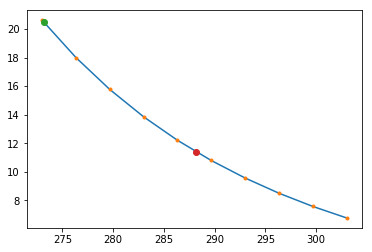

In [4]:
T = np.linspace(273, 303, 10)  # environmentallly realistic range of temps.
kv1 = kvisc(T, a1)
kv2 = kvisc(T, a2)

plt.plot(T, kv1)
plt.plot(T, kv2, '.')
plt.plot(t1, v1, 'o')
plt.plot(t2, v2, 'o')


## More than two data points

There are (at least) three options here:

1) log-interpolate between each pair or points

3) Do a least squares fit to all the data

4) use the two points at the span of environmentally relevent data

(1) is kind of a pain, so let's explore the other options

### Least squares fit

#### Sample data: 
HOOPS BLEND, ExxonMobil


| Viscosity  | Temperature |
|------------|-------------|
| 19.6 cSt   | 4.85  °C    |
| 13.2 cSt   | 15.85 °C    |
| 9.85 cSt   | 24.85 °C    |
| 9.39 cSt   | 26.85 °C    |
| 6.99 cSt   | 37.85 °C    |
| 6.62 cSt   | 39.85 °C    |



In [5]:
# least squares fit to data:

def lstsq_k_a(viscs, temps):
    viscs = np.asarray(viscs)
    temps = np.asarray(temps)
    A = np.c_[np.ones_like(viscs), 1.0 / temps]
    b = np.log(viscs)
    x = x, residuals, rank, s = np.linalg.lstsq(A, b)
    K = x[1]
    a = np.exp(x[0])
    print("solution:", K, a)
    return K, a
    


    

solution: 2684.0463074485965 0.001234562792846486


/Users/chris.barker/miniconda3/envs/gnome/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0.5,1,'HOOPS BLEND, ExxonMobil')

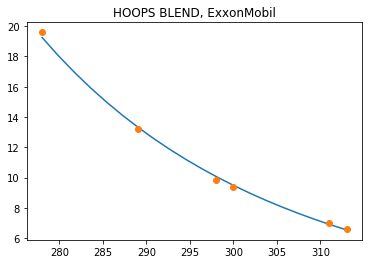

In [8]:
viscs = [19.6, 13.2, 9.85, 9.39, 6.99, 6.62]
temps = np.array([4.85, 15.85, 24.85, 26.85, 37.85, 39.85]) + 273.16

k_v2, A = lstsq_k_a(viscs, temps)


T = np.linspace(min(temps), max(temps), 20)

fit_visc = A * np.exp(k_v2 / T)

plt.plot(T, fit_visc)
plt.plot(temps, viscs, 'o')
plt.title('HOOPS BLEND, ExxonMobil')



## Example 2: a refined product:

MARINE INTERMEDIATE FUEL OIL

API: 12.9

```
Dynamic Viscosity:
Viscosity	Temperature
64000 cP	-0.15 °C
31500 cP	4.85 °C
16000 cP	9.85 °C
8200 cP	14.85 °C
```

```
Density:
Density	Temperature
0.991 g/cm³	-0.15 °C
0.987 g/cm³	4.85 °C
0.983 g/cm³	9.85 °C
0.979 g/cm³	14.85 °C
```



solution: 10695.492500499755 6.258824740751891e-13


/Users/chris.barker/miniconda3/envs/gnome/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0.5,1,'MARINE INTERMEDIATE FUEL OIL')

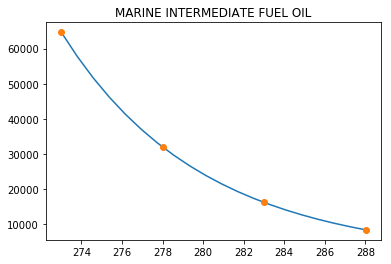

In [7]:
dviscs = np.array([64000, 31500, 16000, 8200])
densities = np.array([.991, .987, .983, .979])
viscs = dviscs / densities
temps = np.array([-0.15, 4.85, 9.85, 14.85]) + 273.16

k_v2, A = lstsq_k_a(viscs, temps)


T = np.linspace(min(temps), max(temps), 20)

fit_visc = A * np.exp(k_v2 / T)

plt.plot(T, fit_visc)
plt.plot(temps, viscs, 'o')
plt.title('MARINE INTERMEDIATE FUEL OIL')
